In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fatalities = pd.read_csv("Fatalities.csv")
fatalities.head()

,Unnamed: 0,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,...,nfatal2124,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp
0,1,al,1982,1.37,14.4,10544.152344,50.692039,1.539379,30.355700,0.32829,...,32,309.437988,3942002.25,208999.593750,221553.43750,290000.06250,28516.0,9.7,57.799999,-0.022125
1,2,al,1983,1.36,13.7,10732.797852,52.147030,1.788991,30.333599,0.34341,...,35,341.834015,3960008.00,202000.078125,219125.46875,290000.15625,31032.0,9.6,57.900002,0.046558
2,3,al,1984,1.32,11.1,11108.791016,54.168087,1.714286,30.311501,0.35924,...,34,304.872009,3988991.75,196999.968750,216724.09375,288000.15625,32961.0,7.5,59.500004,0.062798
3,4,al,1985,1.28,8.9,11332.626953,55.271137,1.652542,30.289499,0.37579,...,45,276.742004,4021007.75,194999.734375,214349.03125,284000.31250,35091.0,7.2,60.100002,0.027490
4,5,al,1986,1.23,9.8,11661.506836,56.514496,1.609907,30.267401,0.39311,...,29,360.716003,4049993.75,203999.890625,212000.00000,263000.28125,36259.0,7.0,60.700001,0.032143


Initial Thoughts on the dataset:
- The dataset describes a detailed view of deaths happened due to traffic accidents in the lower 48 States of America.
- The data consists of 4 categorical and 30 Numerical Attributes.
- The attributes here shown are directly related to the fatalities that happened across the road traffic accidents.
- The data here is from 1982 to 1988 (ie.7 years).
- By understanding these attributes, we can find an analysis of how these accidents are happened and what are the attributes which contributed the most to these accidents.
- The data here consists of 336 rows and 34 columns

In [13]:
categorical_attributes = fatalities.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_attributes = fatalities.select_dtypes(include=['number']).columns.tolist()
print(categorical_attributes)
print(numerical_attributes)

['state', 'breath', 'jail', 'service']
['Unnamed: 0', 'year', 'spirits', 'unemp', 'income', 'emppop', 'beertax', 'baptist', 'mormon', 'drinkage', 'dry', 'youngdrivers', 'miles', 'fatal', 'nfatal', 'sfatal', 'fatal1517', 'nfatal1517', 'fatal1820', 'nfatal1820', 'fatal2124', 'nfatal2124', 'afatal', 'pop', 'pop1517', 'pop1820', 'pop2124', 'milestot', 'unempus', 'emppopus', 'gsp']


Insights that can be extracted from the dataset:
- We can find how the alcohol consumption leads to traffic fatalities
- We can find a correlation between how the age of drivers (mentality at that age) causes traffic fatalities.
- We can find how the state laws especially laws particular to the alcohol drinking age and mandatory jail sentence period correlate with the traffic fatalities in different states.
- How income and unemployment rates cause an impact on traffic accidents.
- How traffic at night time causes fatalities
- Correlating age of young drivers and traffic deaths

Hypothesis from the dataset:
- Hypothesis 1: States which has higher taxes on beers will have lower alcohol based traffic fatalities.
- Hypothesis 2: States that will have a lower alcohol drinking age will have larger traffic accidents.
- Hypothesis 3: States that strictly follow the breath test laws will experience a low traffic death rate.
- Hypothesis 4: States with mandatory jail sentences for drunk and driving cases will have low traffic fatalities.
- Hypothesis 5: States which has drivers driving more miles will have higher traffic fatality rates.
- Hypothesis 6: States with lower income levels might lead to risky driving patterns and cause traffic accidents.
- Hypothesis 7: States with lower income will have less vehicle usage and low rate of traffic deaths and states with higher per capita income will have high usage of vehicles and high rate of traffic deaths.
- Hypothesis 8: States with larger populations will have higher rates of fatalities.
- Hypothesis 9: States with higher economic growth will have reduced fatality rates since they have good roads and infrastructure.
- Hypothesis 10: States with more numbers of Religious people (ie. Baptist or Mormon) will follow strict regulations and beliefs (ie. they won't drink alcohol) so this will result in fewer accidents.  

In [39]:
sorted_beer_tax = fatalities.sort_values(by='beertax')
low_tax_states = sorted_beer_tax.head(10)
higher_tax_states = sorted_beer_tax.tail(10)
print(low_tax_states['state'])
print(higher_tax_states['state'])
states = pd.concat([low_tax_states,higher_tax_states])

335    wy
334    wy
333    wy
332    wy
331    wy
330    wy
329    wy
195    nj
194    nj
193    nj
Name: state, dtype: object
261    sc
260    sc
259    sc
62     ga
61     ga
60     ga
59     ga
58     ga
57     ga
56     ga
Name: state, dtype: object


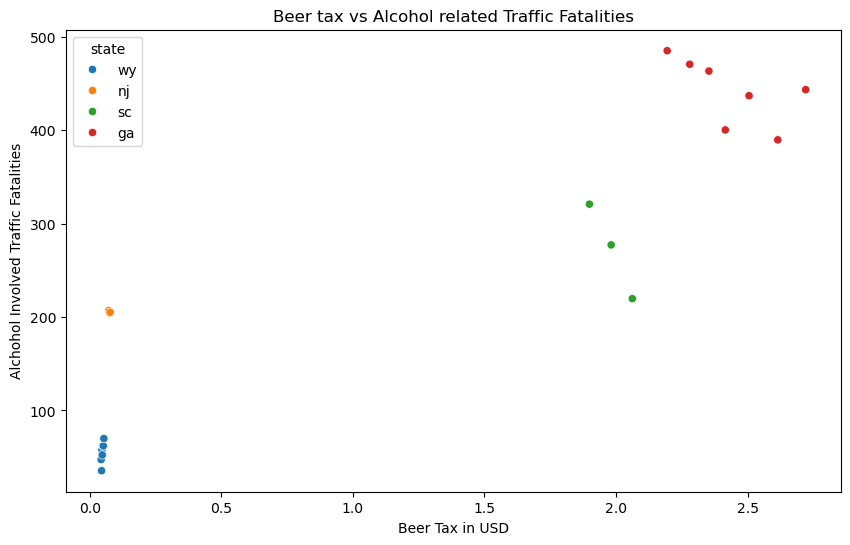

In [41]:
# Hypothesis 1
plt.figure(figsize=(10,6))
sns.scatterplot(data=states, x = 'beertax', y = 'afatal', hue = 'state')
plt.title('Beer tax vs Alcohol related Traffic Fatalities')
plt.xlabel('Beer Tax in USD')
plt.ylabel('Alchohol Involved Traffic Fatalities')
plt.show()

Here, the graph visualizes that in states such as 'Wy' and 'NJ' clearly shows that it is having lower beer tax rate and it's having lower traffic death rates.
But on the other hand, states like 'Sc' and 'ga' having higher beer tax rates and it's also having the higher traffic death rates.
So, Hypothesis 1 is false and Beer tax rate has no impact with the alcohol related traffic fatalities.

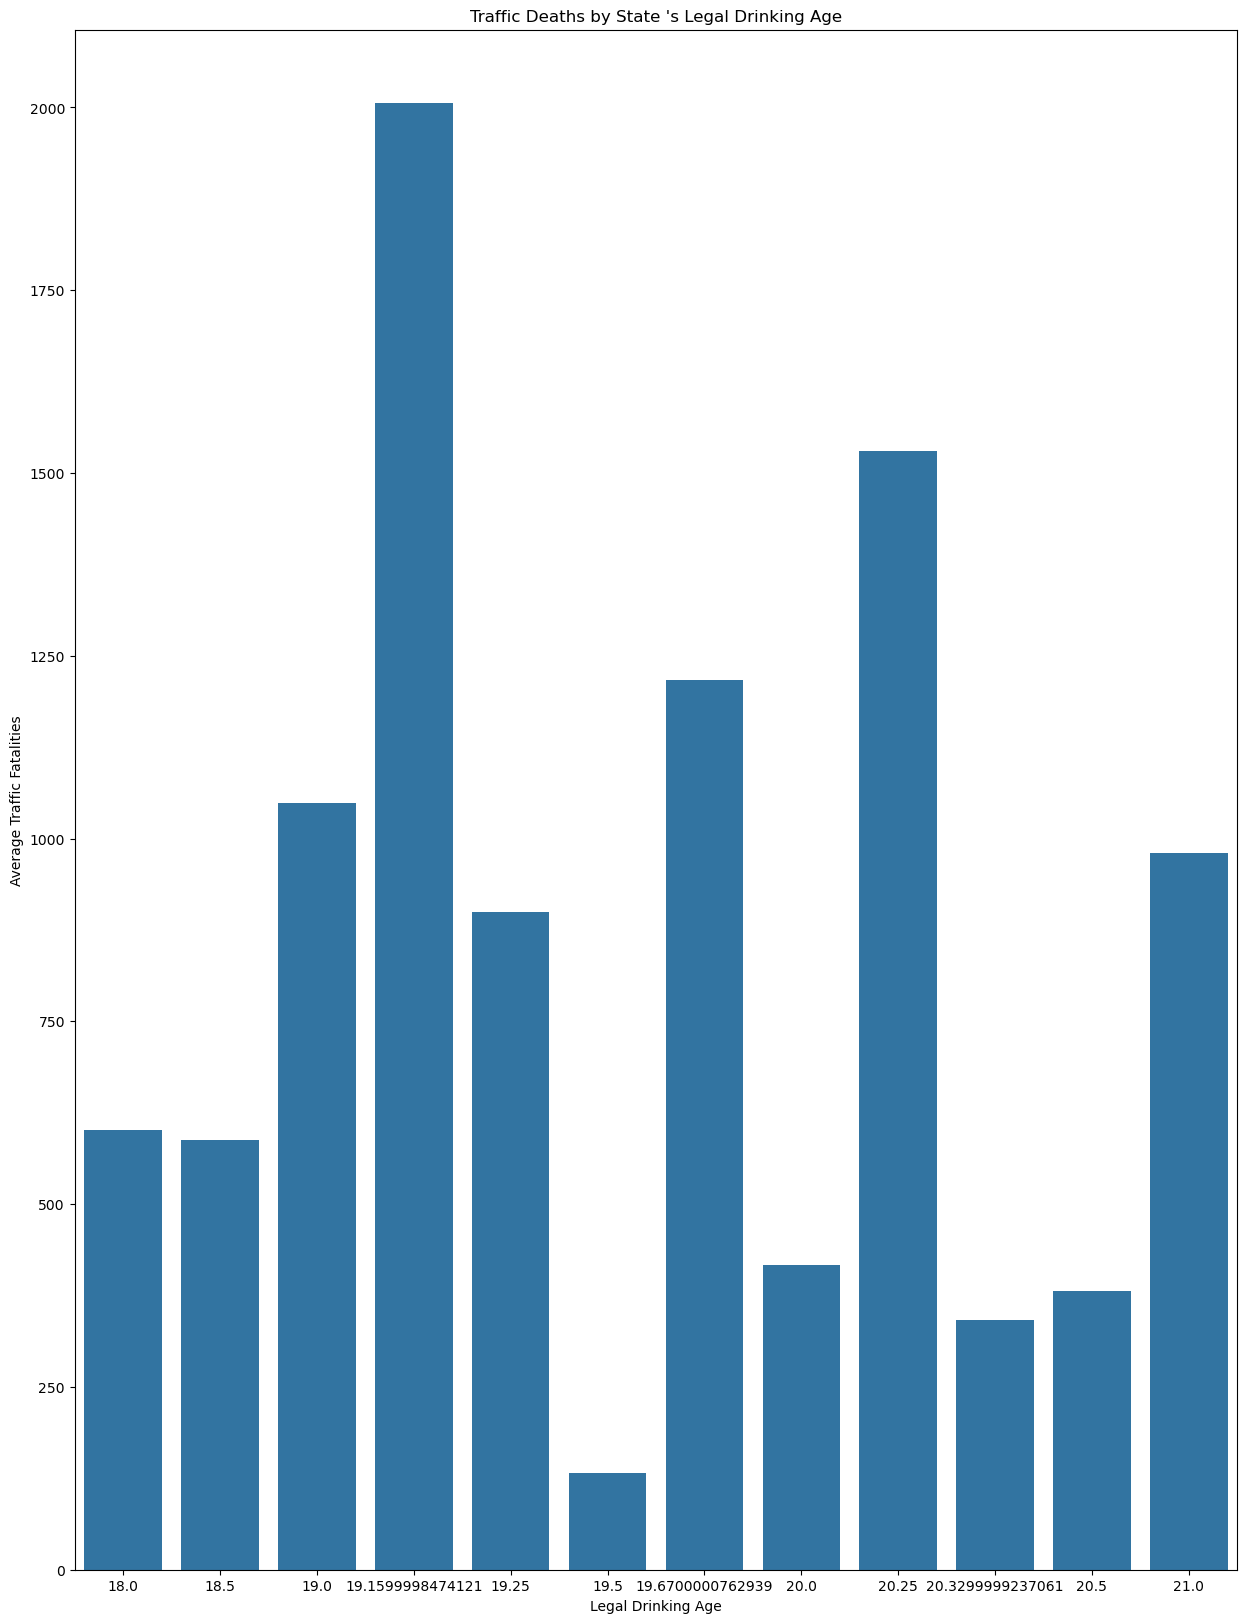

In [58]:
# Hypothesis 2
age_fatalities = fatalities.groupby('drinkage')['fatal'].mean().reset_index()
plt.figure(figsize=(15,20))
sns.barplot(data=age_fatalities, x='drinkage', y='fatal')
plt.title('Traffic Deaths by State \'s Legal Drinking Age')
plt.xlabel('Legal Drinking Age')
plt.ylabel('Average Traffic Fatalities')
plt.show()

Here, also there's no clear visual explanation between the legal age for drinking and traffic fatalities because in states with 18,18.5 have low fatal rates and some states with ages 20,20.3,20.5 also shows the same. Some states with ages of just 19,19.15 shows very high traffic fatality rates. 
So, this hypothesis 2 also fails to prove.

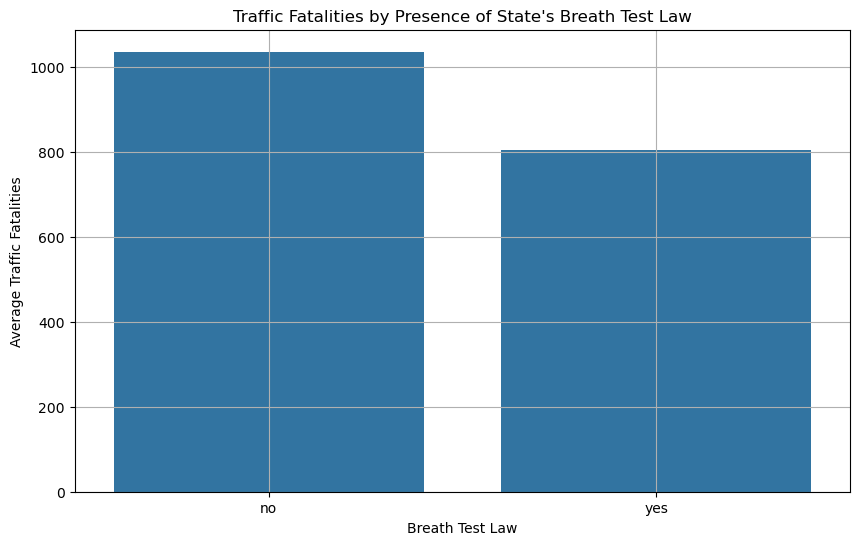

In [65]:
# Hypothesis 3
breath_test = fatalities.groupby('breath')['fatal'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=breath_test, x='breath',y='fatal')
plt.title('Traffic Fatalities by Presence of State\'s Breath Test Law')
plt.xlabel('Breath Test Law')
plt.ylabel('Average Traffic Fatalities')
plt.grid()

This plot clearly shows that the States which don't have the Breath Test law have higher Traffic fatalities compared to the states which are having the Breath test law.
So the Hypothesis 3 is True.

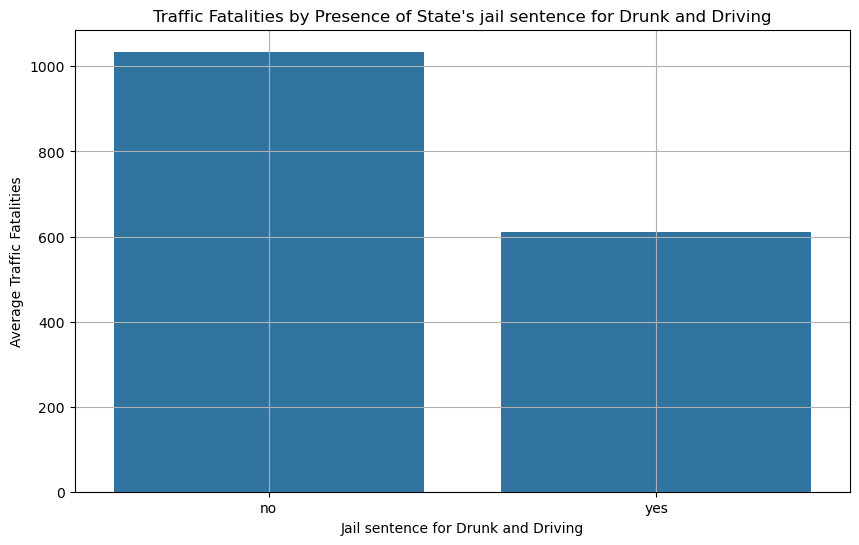

In [70]:
# Hypothesis 4
jail_sentence = fatalities.groupby('jail')['fatal'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data= jail_sentence, x='jail',y='fatal')
plt.title('Traffic Fatalities by Presence of State\'s jail sentence for Drunk and Driving')
plt.xlabel('Jail sentence for Drunk and Driving')
plt.ylabel('Average Traffic Fatalities')
plt.grid()

This plot clearly shows that the States which don't have the Jail Sentence law have higher Traffic fatalities compared to the states which are having the Jail Sentence Law.
So, the Hypothesis 4 is True.

Text(0, 0.5, 'No. of Traffic Deaths')

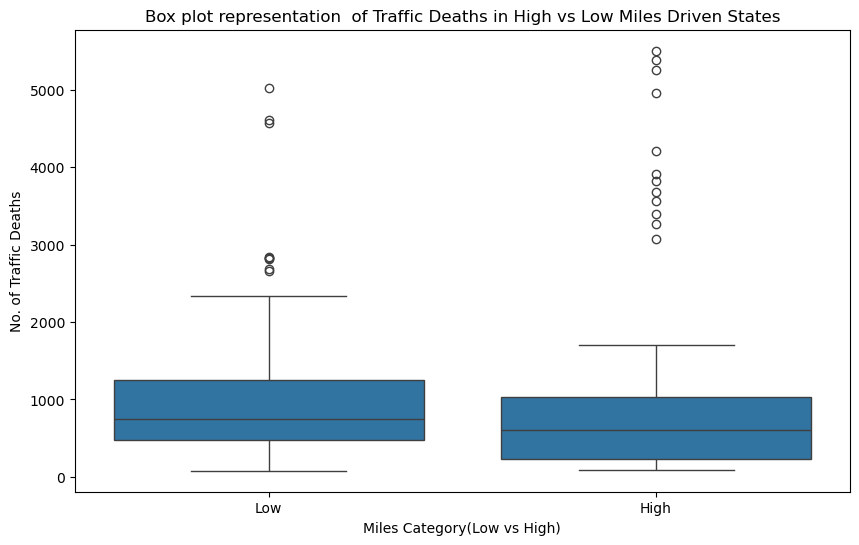

In [79]:
# Hypothesis 5
median_miles = fatalities['miles'].median()
fatalities['Miles categ.'] = fatalities['miles'].apply(lambda x: 'High' if x > median_miles else 'Low')
plt.figure(figsize=(10,6))
sns.boxplot(data=fatalities, x = 'Miles categ.', y= 'fatal')
plt.title('Box plot representation  of Traffic Deaths in High vs Low Miles Driven States')
plt.xlabel('Miles Category(Low vs High)')
plt.ylabel('No. of Traffic Deaths')

This plot shows that the traffic deaths are low in the states where the drivers driven high miles and the traffic deaths are high in the states where the drivers drive low miles.
So, here the Hypothesis 5 clearly fails. And this graph also shows some outliers in the data.

Text(0, 0.5, 'No. of Traffic Fatalities')

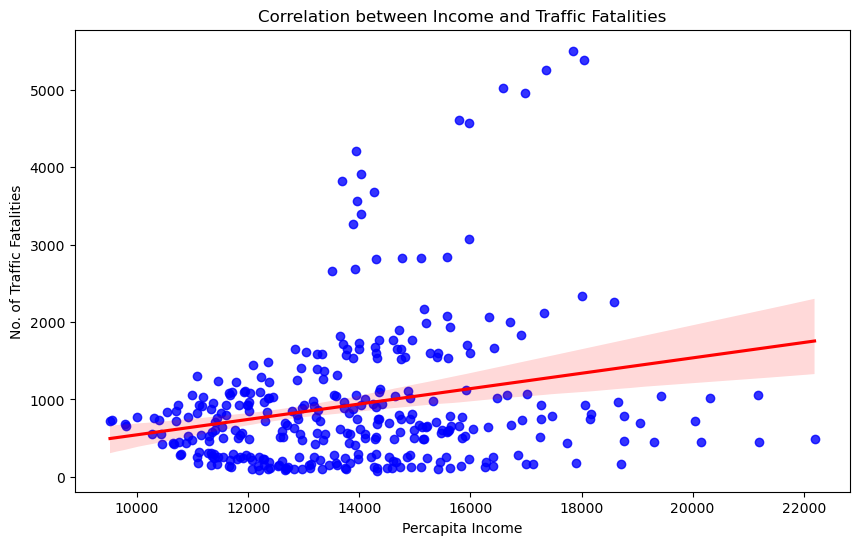

In [82]:
# Hypothesis 6
plt.figure(figsize=(10,6))
sns.regplot(data=fatalities, x='income', y='fatal', scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('Correlation between Income and Traffic Fatalities')
plt.xlabel('Percapita Income')
plt.ylabel('No. of Traffic Fatalities')

Here, the most of the data fit in the percapita income range of 10000 USD to 16000 USD. And, in this mostly the traffic deaths happened are almost similar.
Income level is not correlated with the fatalities. 
So, here the Hypothesis 6 is False.

Text(0, 0.5, 'Traffic Deaths based on the Vehicle Usage average')

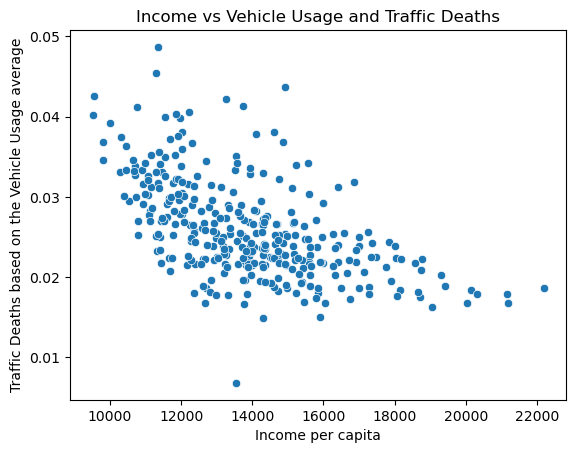

In [85]:
# Hypothesis 7
fatalities['vehicle_usage_deaths'] = fatalities['fatal']/fatalities['milestot']

sns.scatterplot(data=fatalities,x='income',y='vehicle_usage_deaths')
plt.title('Income vs Vehicle Usage and Traffic Deaths')
plt.xlabel('Income per capita')
plt.ylabel('Traffic Deaths based on the Vehicle Usage average')

This plot shows that as the income of the person increases, the average vehicle usage and fatality deaths are becoming lower. But our hypothesis is if the income is lower the vehicle usage will be low and lower traffic fatalities but the plot shows an opposite. 
So, hypothesis 7 is also false.

Text(0, 0.5, 'Number of Traffic Deaths')

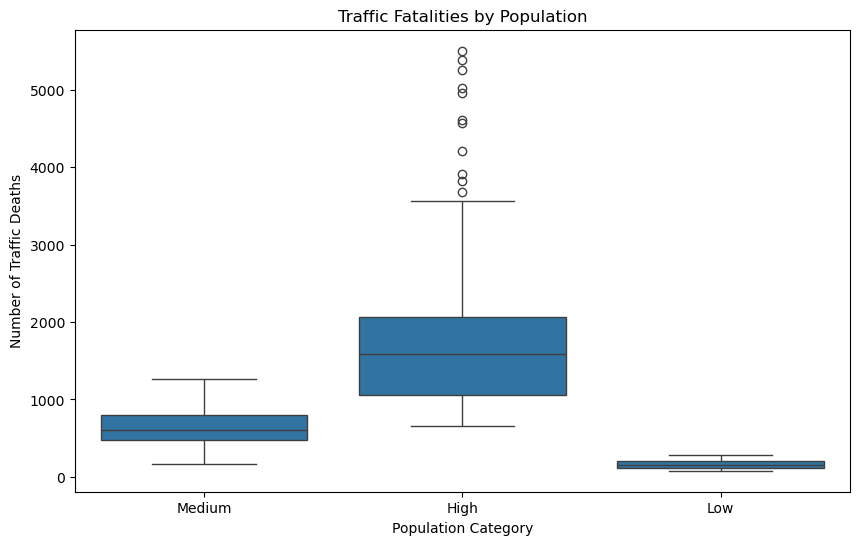

In [92]:
#Hypothesis 8
def population_category(pop):
    if pop < 1000000:
        return 'Low'
    elif 1000000 <= pop < 5000000:
        return 'Medium'
    else:
        return 'High'
fatalities['Population Category'] = fatalities['pop'].apply(population_category)
plt.figure(figsize=(10, 6))
sns.boxplot(data=fatalities, x='Population Category', y='fatal')
plt.title('Traffic Fatalities by Population')
plt.xlabel('Population Category')
plt.ylabel('Number of Traffic Deaths')

This box plot clearly shows that the states which are having higher population is having higher traffic fatalities.
And the states which are having low population is having low traffic fatalities.
So, The Hypothesis 8 is True.


Text(0, 0.5, 'No. of Traffic Fatalities')

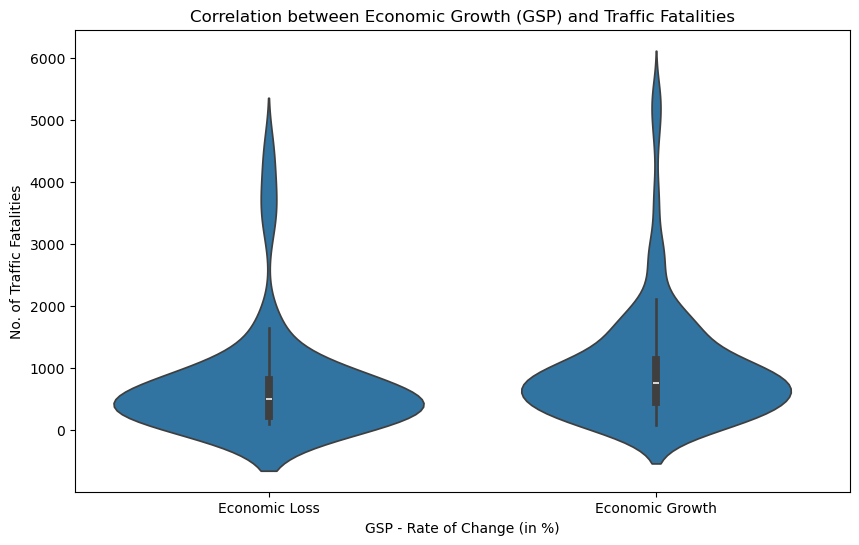

In [99]:
#Hypothesis 9
def gsp_category(gsp_val):
    if gsp_val < 0:
        return 'Economic Loss'
    elif 0 <= gsp_val < 5:
        return 'Economic Growth' 
        
fatalities['GSP Category'] = fatalities['gsp'].apply(gsp_category)
plt.figure(figsize=(10,6))
sns.violinplot(data=fatalities, x='GSP Category', y='fatal')
plt.title('Correlation between Economic Growth (GSP) and Traffic Fatalities')
plt.xlabel('GSP - Rate of Change (in %)')
plt.ylabel('No. of Traffic Fatalities')

Here the violin plot shows that, the states which are experiencing economic loss and has no development in infrastructure is having low traffic fatalities. And the states which are having a better economic growth which are having good roads and infrastructure has higher traffic fatalities.
So, The Hypothesis 9 is False.


Text(0, 0.5, 'No. of Traffic Deaths')

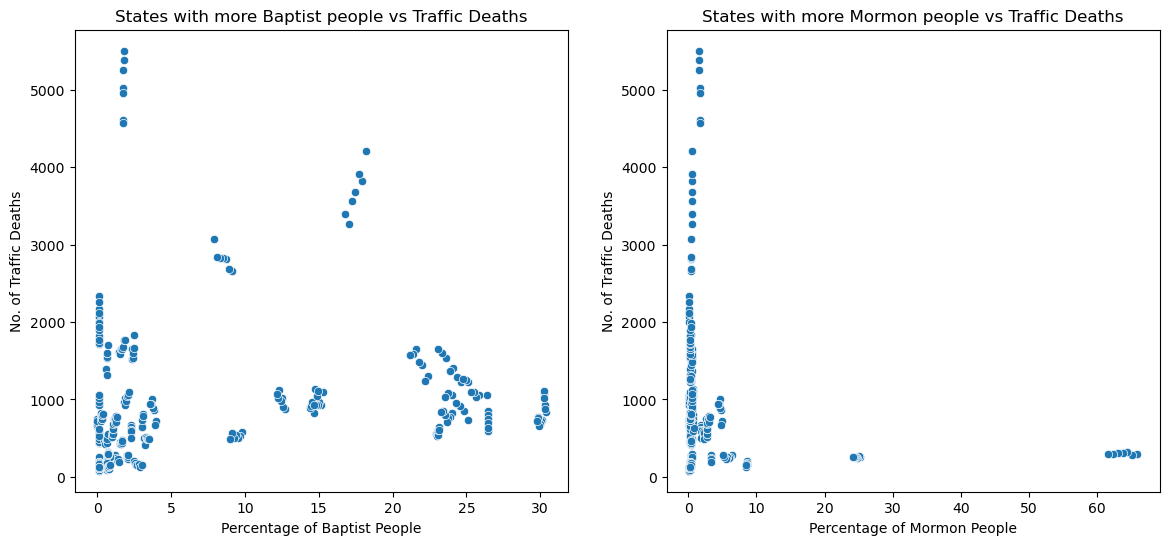

In [111]:
#Hypothesis 10
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.scatterplot(data=fatalities, x = 'baptist', y = 'fatal')
plt.title('States with more Baptist people vs Traffic Deaths')
plt.xlabel('Percentage of Baptist People')
plt.ylabel('No. of Traffic Deaths')
plt.subplot(1, 2, 2)
sns.scatterplot(data=fatalities, x = 'mormon', y = 'fatal')
plt.title('States with more Mormon people vs Traffic Deaths')
plt.xlabel('Percentage of Mormon People')
plt.ylabel('No. of Traffic Deaths')

Here this scatter plot 1 shows that there is no correlation between Baptist people and no. of traffic deaths because the points are very randomly scattered.
But in scatter plot 2 there is a correlation between the Mormon people and no. of traffic deaths ie. The states with More Mormon people have very low no. of Traffic deaths.
So, here the Hypothesis 10 is true for the Mormon religious community and it's false for Baptist Religious Community.